#Instrucciones Miniproyecto 2

##Descripción
Usará funciones de Spark y Spark SQL sobre datos en formato CSV, correspondiente a
datos bancarios de clientes, donde se tiene una columna de si el cliente contrató o no un
crédito. Usarás funciones de Spark y Spark SQL para realizar análisis sobre los datos.
Se usará un notebook de Google Colab como herramienta de ejecución de código y como
informe de entrega del miniproyecto, por lo que se requiere que se cumpla el siguiente
formato de entrega:
1. Debes nombrar el notebook como <apellido>_<nombre>.ipynb
2. Cada parte del miniproyecto debe estar contenido en una celda, y el output que se
pide para la evaluación debe estar explícitamente impreso en el notebook.


#El trabajo a realizar
##1. [Celda 1] Usando el notebook practica spark sql.,ipynb como base, importe e instale Hadoop y Spark.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
exec(open('/content/drive/MyDrive/BigDataSw/spark_colab_installer.py').read())

Active services:
2513 DataNode
2434 NameNode
2644 JobHistoryServer
2360 ResourceManager
2683 Jps
2591 NodeManager

Apache Spark installed


##2. [Celda 2] Usando un snippet de upload, cargue el archivo bank-additional-full.csv que lo usará de input de datos.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bank-additional-full.csv to bank-additional-full.csv
User uploaded file "bank-additional-full.csv" with length 5834924 bytes


In [ ]:
!hdfs dfs -mkdir bank_files
!hdfs dfs -put bank-additional-full.csv bank_files

In [ ]:
!hdfs dfs -ls bank_files

Found 1 items
-rw-r--r--   1 root supergroup    5834924 2024-04-23 02:46 bank_files/bank-additional-full.csv


##3. [Celda 3] Cree una sesión de Spark SQL e importe los datos del CSV. Imprima en pantalla una muestra de las 5 primeras columnas y el número de registros del archivo CSV.

In [ ]:
import findspark
findspark.init()

import csv

from pyspark.sql import SparkSession

# Se crea sesion de spark sql
spark = SparkSession.builder.appName('miniproyecto').getOrCreate()

# Importar los datos del CSV desde Google Drive
df = spark.read.format('csv').option('header', 'true').option('inferSchema', 'true').option('delimiter', ';').load('bank_files/bank-additional-full.csv')

# Imprimir una muestra de las 5 primeras columnas
df.show(5)

# Imprimir el número de registros del archivo CSV
print("Número de registros: ", df.count())



+---+---------+-------+-----------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|      job|marital|  education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp.var.rate|cons.price.idx|cons.conf.idx|euribor3m|nr.employed|  y|
+---+---------+-------+-----------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 56|housemaid|married|   basic.4y|     no|     no|  no|telephone|  may|        mon|     261|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
| 57| services|married|high.school|unknown|     no|  no|telephone|  may|        mon|     149|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
| 37| serv

##4. [Celda 4] Cree un Dataframe de nombre simpleDF_yes que contenga las columnas [“age”, “job”, “education”, “housing”] para aquellos donde la columna “y” tiene valor “yes” (que contrató un crédito), y un Dataframe simpleDF_no con las mismas columnas que simpleDF_yes pero para aquellos con el valor de “y” en “no”. Muestre las primeros 10 registros de ambos Dataframes.

In [ ]:
# Crear el DataFrame simpleDF_yes
simpleDF_yes = df.select(['age', 'job', 'education', 'housing']).filter(df['y'] == 'yes')

#Crear el DataFrame simpleDF_no
simpleDF_no = df.select(['age', 'job', 'education', 'housing']).filter(df['y'] == 'no')

# Mostrar los primeros 10 registros de simpleDF_yes
print("Primeros 10 registros de simpleDF_yes:")
simpleDF_yes.show(10)

# Mostrar los primeros 10 registros de simpleDF_no
print("Primeros 10 registros de simpleDF_no:")
simpleDF_no.show(10)


Primeros 10 registros de simpleDF_yes:
+---+------------+-------------------+-------+
|age|         job|          education|housing|
+---+------------+-------------------+-------+
| 41| blue-collar|           basic.4y|    yes|
| 49|entrepreneur|  university.degree|    yes|
| 49|  technician|           basic.9y|     no|
| 41|  technician|professional.course|    yes|
| 45| blue-collar|           basic.9y|    yes|
| 42| blue-collar|           basic.9y|    yes|
| 39|   housemaid|           basic.9y|    yes|
| 28|     unknown|            unknown|    yes|
| 44|    services|        high.school|    yes|
| 42|  technician|professional.course|     no|
+---+------------+-------------------+-------+
only showing top 10 rows

Primeros 10 registros de simpleDF_no:
+---+-----------+-------------------+-------+
|age|        job|          education|housing|
+---+-----------+-------------------+-------+
| 56|  housemaid|           basic.4y|     no|
| 57|   services|        high.school|     no|
| 37|   s

##5. [Celda 5] Usando funciones de Spark, y usando matplotlib.pyplot como herramienta de visualización, genere histogramas de cada columna de los Dataframes anteriores. Para la columna “age”, use intervalos de 10 años. Muestre histogramas con la función matplotlib.pyplot.bar, uno para cada columna y Dataframe. Use el ejemplo de ejemplos_matplotlib.py para obtener orientación en el manejo de los gráficos.

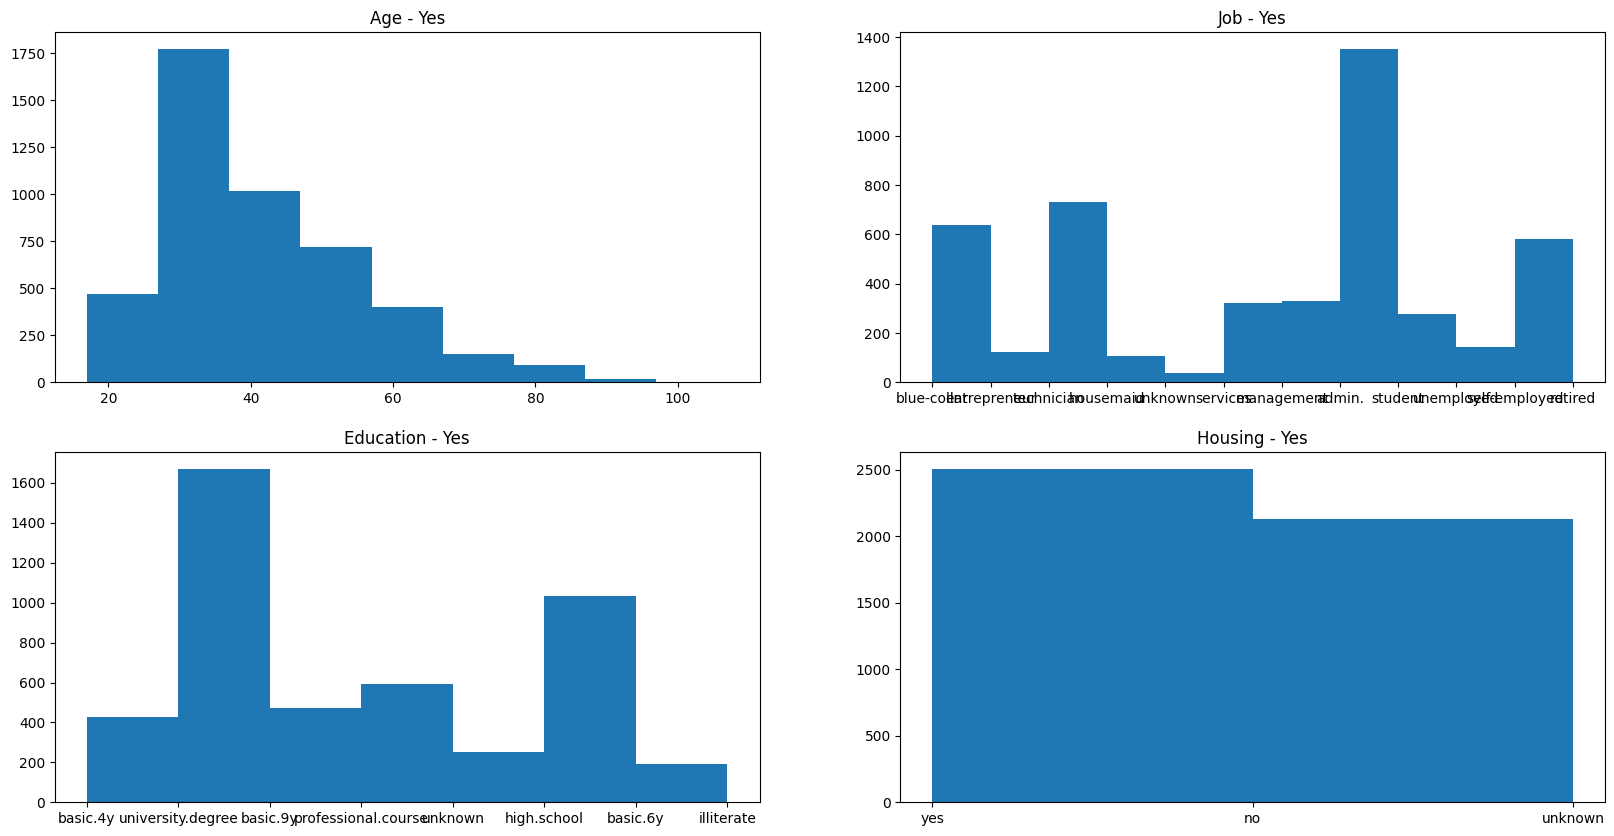

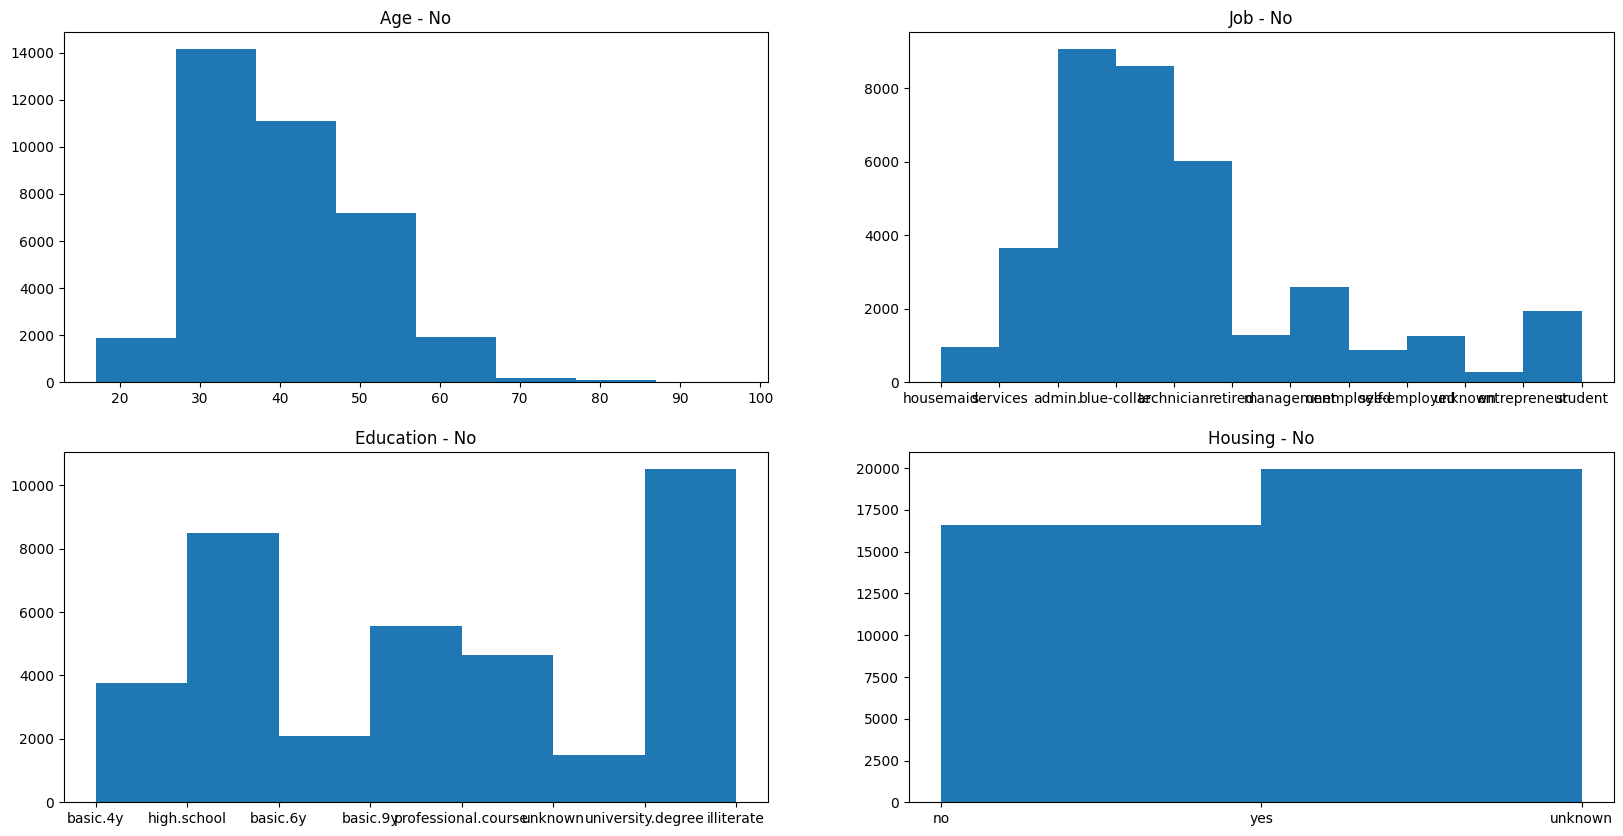

In [ ]:
import matplotlib.pyplot as plt

# Convertir las columnas de los DataFrames a listas
#age_eyes selecciona columna age desde DF simpleDF_yes, la convierte en un RDD, se crea lista de valores
#y se agregan a lista collect. Se repite para cada columna y para el DF simpleDF_no
age_yes = simpleDF_yes.select('age').rdd.flatMap(lambda x: x).collect()
job_yes = simpleDF_yes.select('job').rdd.flatMap(lambda x: x).collect()
education_yes = simpleDF_yes.select('education').rdd.flatMap(lambda x: x).collect()
housing_yes = simpleDF_yes.select('housing').rdd.flatMap(lambda x: x).collect()

age_no = simpleDF_no.select('age').rdd.flatMap(lambda x: x).collect()
job_no = simpleDF_no.select('job').rdd.flatMap(lambda x: x).collect()
education_no = simpleDF_no.select('education').rdd.flatMap(lambda x: x).collect()
housing_no = simpleDF_no.select('housing').rdd.flatMap(lambda x: x).collect()

# Crear histogramas para simpleDF_yes
#Se crea una nueva figura para los gráficos con un tamaño de 20x10.
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
#plt.hist() crea histograma de los valores en age_yes, con los bins definidos por el rango
#desde el valor mínimo en age_yes hasta el valor máximo más 10, con un paso de 10.
#Se replica la misma logica para las siguientes columnas y para los DF
plt.hist(age_yes, bins=range(min(age_yes), max(age_yes) + 10, 10))
plt.title('Age - Yes')

plt.subplot(2, 2, 2)
plt.hist(job_yes, bins=range(len(set(job_yes))))
plt.title('Job - Yes')

plt.subplot(2, 2, 3)
plt.hist(education_yes, bins=range(len(set(education_yes))))
plt.title('Education - Yes')

plt.subplot(2, 2, 4)
plt.hist(housing_yes, bins=range(len(set(housing_yes))))
plt.title('Housing - Yes')

plt.show()

# Crear histogramas para simpleDF_no
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
plt.hist(age_no, bins=range(min(age_no), max(age_no) + 10, 10))
plt.title('Age - No')

plt.subplot(2, 2, 2)
plt.hist(job_no, bins=range(len(set(job_no))))
plt.title('Job - No')

plt.subplot(2, 2, 3)
plt.hist(education_no, bins=range(len(set(education_no))))
plt.title('Education - No')

plt.subplot(2, 2, 4)
plt.hist(housing_no, bins=range(len(set(housing_no))))
plt.title('Housing - No')

plt.show()


##6. [Celda 6] Usando funciones de Spark SQL, cree una tabla temporal llamada countsDF sobre el Dataframe simpleDF_yes, y realiza un query SQL que agrupe los datos de acuerdo a [“job”, “education”] y que cuente la aparición de cada caso dentro de la tabla, ordenando el conteo en forma descendente. Muestra los primeros 20 registros de la tabla resultante.

In [ ]:
# Crear una tabla temporal llamada countsDF sobre el DataFrame simpleDF_yes
simpleDF_yes.createOrReplaceTempView("countsDF")

# Se realiza un query SQL que agrupe los datos de acuerdo a "job" y "education" y que cuente la
# aparición de cada caso dentro de la tabla, ordenando el conteo en forma descendente
result = spark.sql(" SELECT job, education, COUNT(*) as count FROM countsDF GROUP BY job, education ORDER BY count DESC")

# Mostrar los primeros 20 registros de la tabla resultante
result.show(20)


+-------------+-------------------+-----+
|          job|          education|count|
+-------------+-------------------+-----+
|       admin.|  university.degree|  823|
|       admin.|        high.school|  382|
|   technician|professional.course|  343|
|   management|  university.degree|  257|
|  blue-collar|           basic.9y|  240|
|   technician|  university.degree|  225|
|     services|        high.school|  203|
|      retired|           basic.4y|  185|
|  blue-collar|           basic.4y|  123|
|      student|        high.school|  114|
|  blue-collar|           basic.6y|  107|
|self-employed|  university.degree|   96|
|  blue-collar|        high.school|   94|
|   technician|        high.school|   85|
|      retired|  university.degree|   66|
| entrepreneur|  university.degree|   66|
|      retired|        high.school|   62|
|      student|            unknown|   59|
|      retired|professional.course|   57|
|    housemaid|           basic.4y|   51|
+-------------+-------------------

##7. [Celda 7] Guarda countsDF, simpleDF_yes y simpleDF_no en HDFS, en formato JSON. Puedes usar la función <Dataframe>.format(‘json’).save(<path/archivo.json>). Muestra la ruta de HDFS con los archivos (hint: usar !hdfs dfs -ls <path>).

In [ ]:
# Se realiza un query SQL que agrupe los datos de acuerdo a "job" y "education" y que cuente la
# aparición de cada caso dentro de la tabla, ordenando el conteo en forma descendente
countsDF = spark.sql(" SELECT job, education, COUNT(*) as count FROM countsDF GROUP BY job, education ORDER BY count DESC")


# Guardar countsDF, simpleDF_yes y simpleDF_no en HDFS en formato JSON
countsDF.write.format('json').save('hdfs://localhost:9000/user/countsDF.json')
simpleDF_yes.write.format('json').save('hdfs://localhost:9000/user/simpleDF_yes.json')
simpleDF_no.write.format('json').save('hdfs://localhost:9000/user/simpleDF_no.json')

# Mostrar la ruta de HDFS con los archivos
!hdfs dfs -ls /user/



Found 5 items
drwxr-xr-x   - root supergroup          0 2024-04-23 05:09 /user/countsDF.json
drwxr-xr-x   - root supergroup          0 2024-04-23 02:42 /user/hive
drwxr-xr-x   - root supergroup          0 2024-04-23 02:46 /user/root
drwxr-xr-x   - root supergroup          0 2024-04-23 05:10 /user/simpleDF_no.json
drwxr-xr-x   - root supergroup          0 2024-04-23 05:09 /user/simpleDF_yes.json


##8. [Celda 8] Usando funciones de Spark y RDD, realice el mismo procedimiento que la [Celda 6], programando todos los pasos sin usar Dataframe, desde el input del archivo usando sc.textFile. Imprima en pantalla los primeros 20 registros del RDD resultante.

In [ ]:
from pyspark import SparkContext

# Crear un SparkContext
sc = SparkContext.getOrCreate()

# se lee el archivo usando sc.textFile
rdd = sc.textFile('bank_files/bank-additional-full.csv')

# Eliminar el encabezado
#Se obtiene la primera línea del RDD, que es el encabezado,
#y luego se filtra el RDD para eliminar esta línea y quedarse solo con los datos.
header = rdd.first()
rdd = rdd.filter(lambda line: line != header)

# Dividir cada línea por el delimitador (;)
rdd = rdd.map(lambda line: line.split(';'))

# Se filtra el RDD para seleccionar solo aquellas líneas donde la última
# columna, que corresponde a la columna “y”, tiene el valor "yes".
# Esto indica que el cliente contrató un crédito.
rdd_yes = rdd.filter(lambda x: x[-1] == '"yes"')

# Seleccionar las columnas ["job", "education"]
# que corresponden a las posiciones 1 y 3 de cada sublista.
rdd_yes = rdd_yes.map(lambda x: (x[1], x[3]))

# Se realiza un conteo de la aparición de cada combinación única de “job”
# y “education” utilizando countByValue
result = rdd_yes.countByValue()

# Ordenar el conteo en forma descendente y tomar los primeros 20 registros
result = sorted(result.items(), key=lambda x: x[1], reverse=True)[:20]

# Imprimir los primeros 20 registros del RDD resultante
for item in result:
    print(item)


(('"admin."', '"university.degree"'), 823)
(('"admin."', '"high.school"'), 382)
(('"technician"', '"professional.course"'), 343)
(('"management"', '"university.degree"'), 257)
(('"blue-collar"', '"basic.9y"'), 240)
(('"technician"', '"university.degree"'), 225)
(('"services"', '"high.school"'), 203)
(('"retired"', '"basic.4y"'), 185)
(('"blue-collar"', '"basic.4y"'), 123)
(('"student"', '"high.school"'), 114)
(('"blue-collar"', '"basic.6y"'), 107)
(('"self-employed"', '"university.degree"'), 96)
(('"blue-collar"', '"high.school"'), 94)
(('"technician"', '"high.school"'), 85)
(('"entrepreneur"', '"university.degree"'), 66)
(('"retired"', '"university.degree"'), 66)
(('"retired"', '"high.school"'), 62)
(('"student"', '"unknown"'), 59)
(('"retired"', '"professional.course"'), 57)
(('"housemaid"', '"basic.4y"'), 51)
